In [52]:
#Python libraries
#Classic,data manipulation
import numpy as np
import pandas as pd
# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
%matplotlib inline

['Diabetes_012' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker' 'Stroke'
 'HeartDiseaseorAttack' 'PhysActivity' 'Fruits' 'Veggies'
 'HvyAlcoholConsump' 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth'
 'PhysHlth' 'DiffWalk' 'Sex' 'Age' 'Education' 'Income']


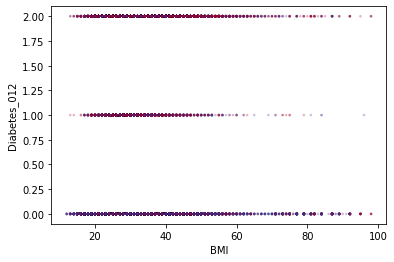

In [53]:
titles = np.loadtxt('./diabetets/diabetes_012_health_indicators_BRFSS2015.csv', delimiter=',',dtype = str,max_rows = 1)
print(titles)
data = np.loadtxt('./diabetets/diabetes_012_health_indicators_BRFSS2015.csv', delimiter=',',skiprows = 1)
plt.scatter(data[:,4], data[:,0], s=3, alpha=0.2, c=data[:,2], cmap='RdYlBu_r');
plt.xlabel('BMI')
plt.ylabel('Diabetes_012');

The model space is discrete  ,try to use forest of trees

## Compute and visualze the correlation

In [54]:
df= pd.read_csv('./diabetets/diabetes_012_health_indicators_BRFSS2015.csv')
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


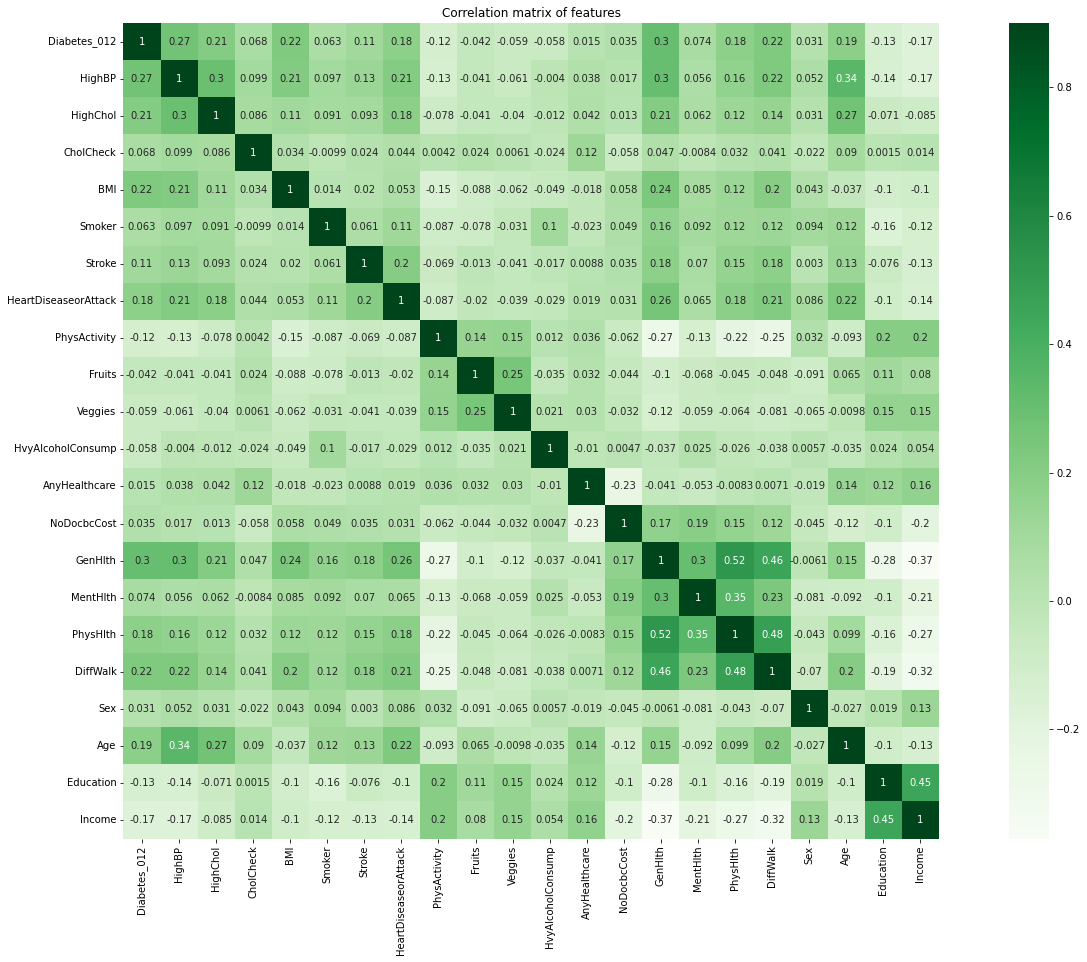

In [55]:
# Compute pairwise pearson correlation of columns, excluding NA/null values.
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, vmax = 0.9, annot= True,cmap = "Greens",square = True)
plt.title("Correlation matrix of features")
plt.show()

## Group diabetes status & features

   Diabetes_012  HighBP   Count
0           0.0     0.0  134391
1           0.0     1.0   79312
2           1.0     0.0    1718
3           1.0     1.0    2913
4           2.0     0.0    8742
5           2.0     1.0   26604


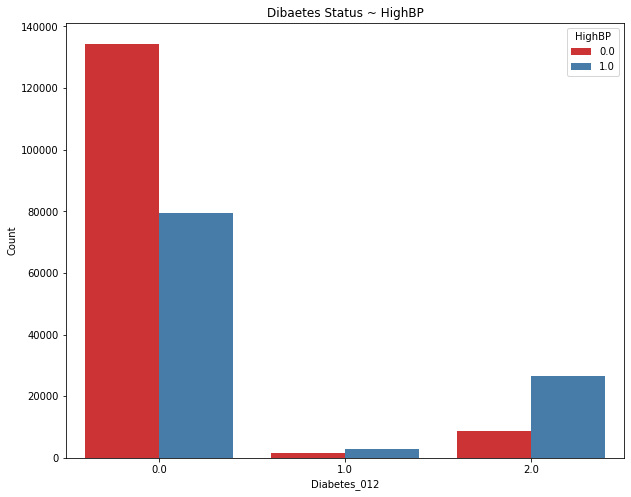

   Diabetes_012  HighChol   Count
0           0.0       0.0  132673
1           0.0       1.0   81030
2           1.0       0.0    1756
3           1.0       1.0    2875
4           2.0       0.0   11660
5           2.0       1.0   23686


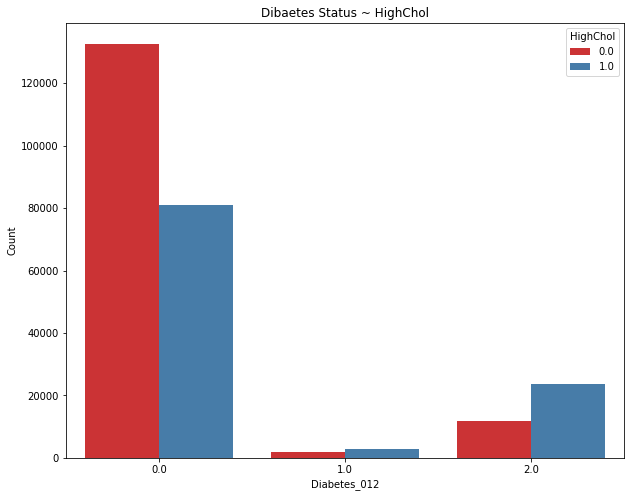

   Diabetes_012  CholCheck   Count
0           0.0        0.0    9167
1           0.0        1.0  204536
2           1.0        0.0      62
3           1.0        1.0    4569
4           2.0        0.0     241
5           2.0        1.0   35105


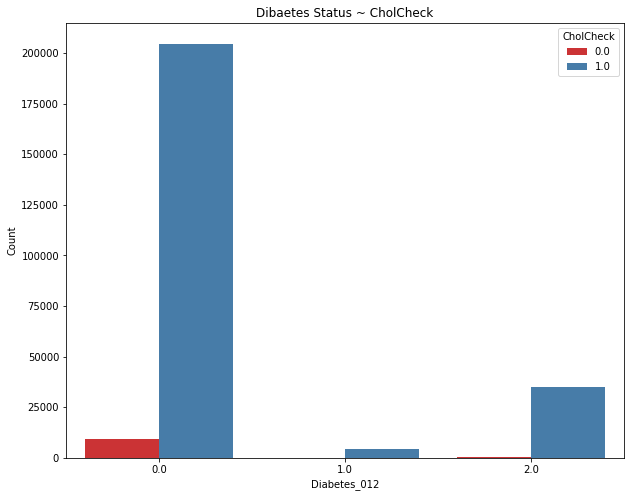

     Diabetes_012   BMI  Count
0             0.0  12.0      6
1             0.0  13.0     18
2             0.0  14.0     36
3             0.0  15.0    120
4             0.0  16.0    326
5             0.0  17.0    719
6             0.0  18.0   1705
7             0.0  19.0   3795
8             0.0  20.0   6039
9             0.0  21.0   9301
10            0.0  22.0  12811
11            0.0  23.0  14541
12            0.0  24.0  17849
13            0.0  25.0  15460
14            0.0  26.0  18275
15            0.0  27.0  21423
16            0.0  28.0  14002
17            0.0  29.0  12371
18            0.0  30.0  11909
19            0.0  31.0   9891
20            0.0  32.0   8077
21            0.0  33.0   6674
22            0.0  34.0   5304
23            0.0  35.0   3975
24            0.0  36.0   3236
25            0.0  37.0   2909
26            0.0  38.0   2283
27            0.0  39.0   1943
28            0.0  40.0   1452
29            0.0  41.0   1088
30            0.0  42.0   1084
31      

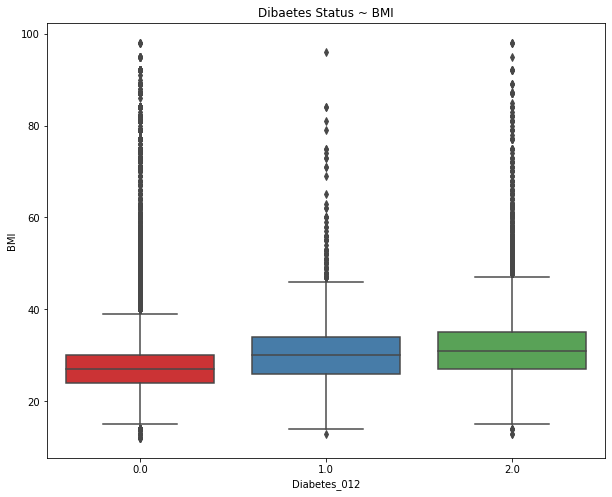

   Diabetes_012  Smoker   Count
0           0.0     0.0  121879
1           0.0     1.0   91824
2           1.0     0.0    2349
3           1.0     1.0    2282
4           2.0     0.0   17029
5           2.0     1.0   18317


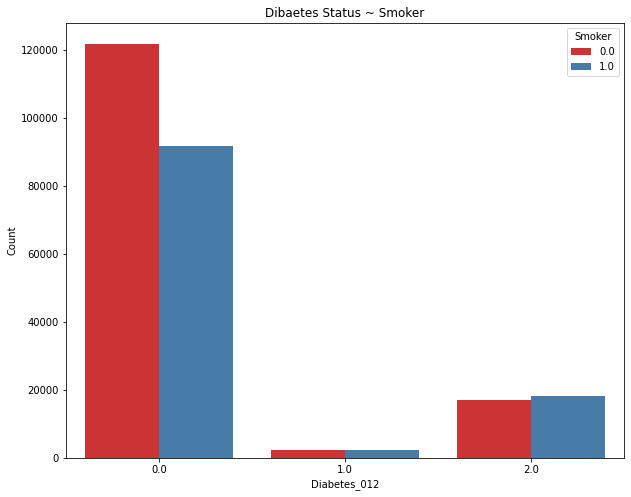

   Diabetes_012  Stroke   Count
0           0.0     0.0  206944
1           0.0     1.0    6759
2           1.0     0.0    4366
3           1.0     1.0     265
4           2.0     0.0   32078
5           2.0     1.0    3268


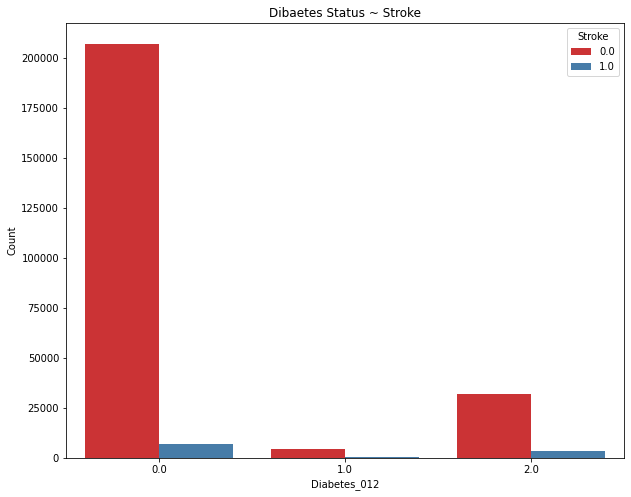

   Diabetes_012  HeartDiseaseorAttack   Count
0           0.0                   0.0  198352
1           0.0                   1.0   15351
2           1.0                   0.0    3967
3           1.0                   1.0     664
4           2.0                   0.0   27468
5           2.0                   1.0    7878


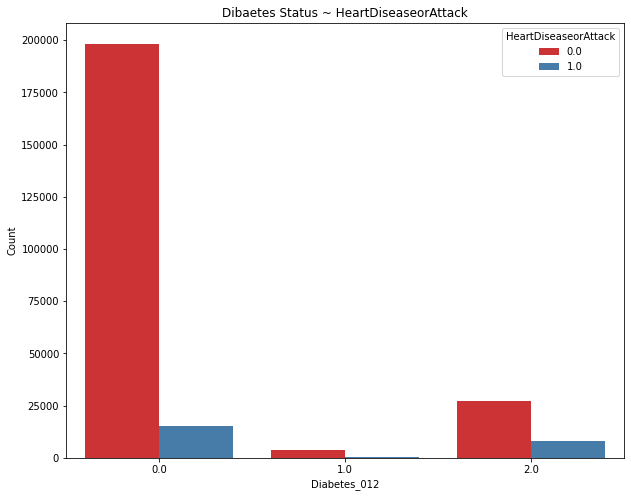

   Diabetes_012  PhysActivity   Count
0           0.0           0.0   47212
1           0.0           1.0  166491
2           1.0           0.0    1489
3           1.0           1.0    3142
4           2.0           0.0   13059
5           2.0           1.0   22287


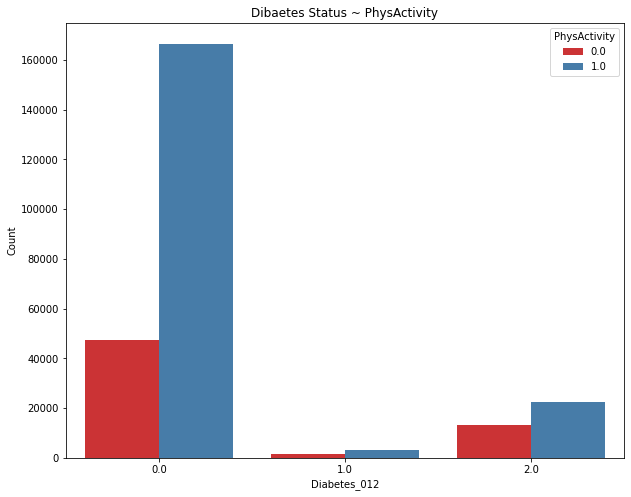

   Diabetes_012  Fruits   Count
0           0.0     0.0   76287
1           0.0     1.0  137416
2           1.0     0.0    1842
3           1.0     1.0    2789
4           2.0     0.0   14653
5           2.0     1.0   20693


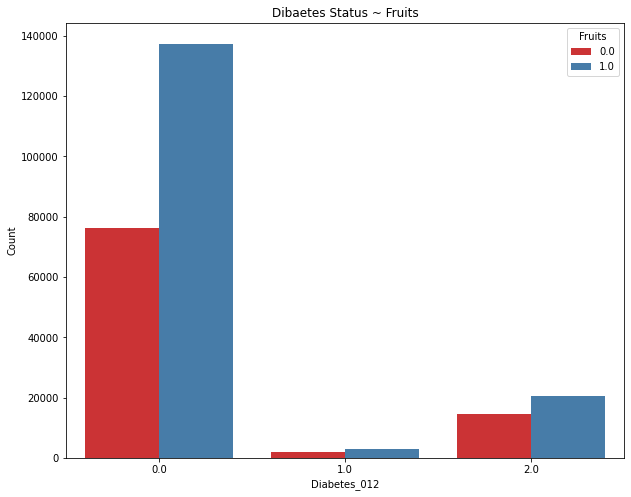

   Diabetes_012  Veggies   Count
0           0.0      0.0   38159
1           0.0      1.0  175544
2           1.0      0.0    1070
3           1.0      1.0    3561
4           2.0      0.0    8610
5           2.0      1.0   26736


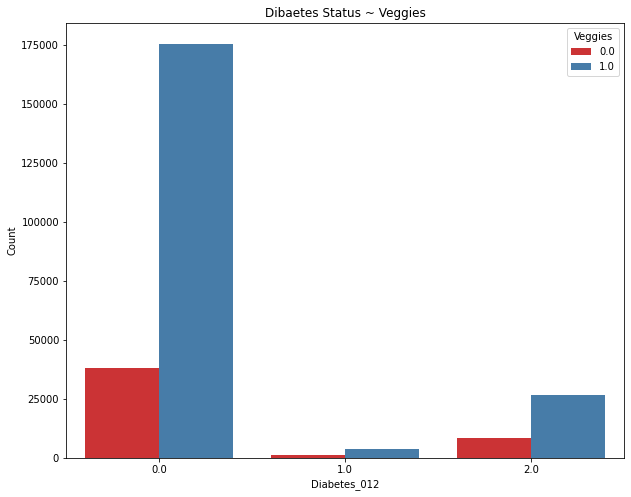

   Diabetes_012  HvyAlcoholConsump   Count
0           0.0                0.0  200487
1           0.0                1.0   13216
2           1.0                0.0    4423
3           1.0                1.0     208
4           2.0                0.0   34514
5           2.0                1.0     832


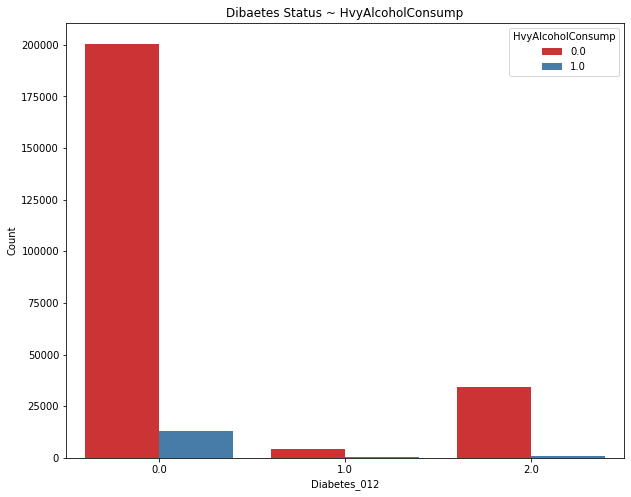

   Diabetes_012  AnyHealthcare   Count
0           0.0            0.0   10741
1           0.0            1.0  202962
2           1.0            0.0     254
3           1.0            1.0    4377
4           2.0            0.0    1422
5           2.0            1.0   33924


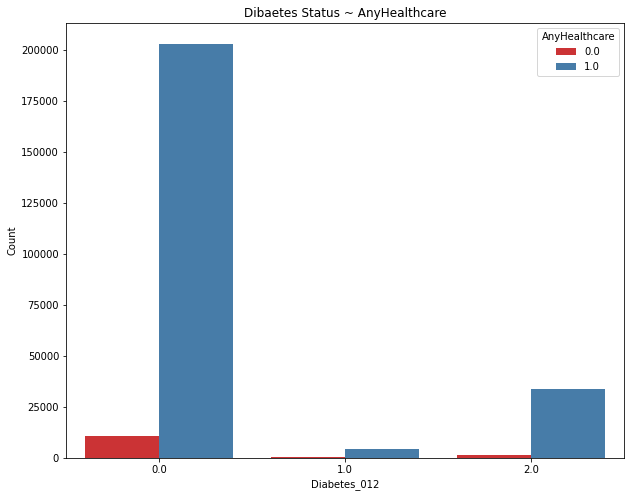

   Diabetes_012  NoDocbcCost   Count
0           0.0          0.0  196690
1           0.0          1.0   17013
2           1.0          0.0    4032
3           1.0          1.0     599
4           2.0          0.0   31604
5           2.0          1.0    3742


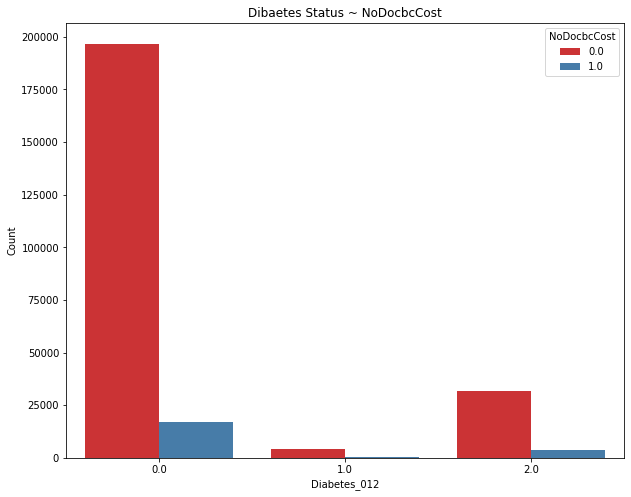

    Diabetes_012  GenHlth  Count
0            0.0      1.0  43846
1            0.0      2.0  81489
2            0.0      3.0  60461
3            0.0      4.0  20755
4            0.0      5.0   7152
5            1.0      1.0    313
6            1.0      2.0   1214
7            1.0      3.0   1728
8            1.0      4.0   1025
9            1.0      5.0    351
10           2.0      1.0   1140
11           2.0      2.0   6381
12           2.0      3.0  13457
13           2.0      4.0   9790
14           2.0      5.0   4578


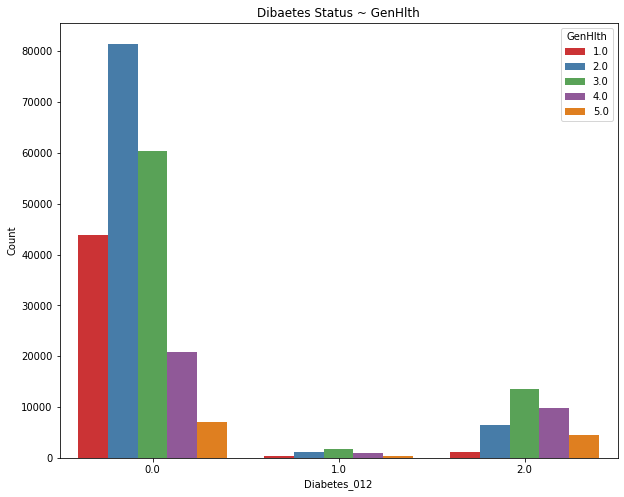

    Diabetes_012  MentHlth   Count
0            0.0       0.0  149321
1            0.0       1.0    7606
2            0.0       2.0   11315
3            0.0       3.0    6332
4            0.0       4.0    3217
5            0.0       5.0    7626
6            0.0       6.0     796
7            0.0       7.0    2632
8            0.0       8.0     516
9            0.0       9.0      69
10           0.0      10.0    5170
11           0.0      11.0      36
12           0.0      12.0     321
13           0.0      13.0      33
14           0.0      14.0     937
15           0.0      15.0    4349
16           0.0      16.0      73
17           0.0      17.0      42
18           0.0      18.0      73
19           0.0      19.0      12
20           0.0      20.0    2624
21           0.0      21.0     170
22           0.0      22.0      50
23           0.0      23.0      28
24           0.0      24.0      25
25           0.0      25.0     882
26           0.0      26.0      35
27           0.0    

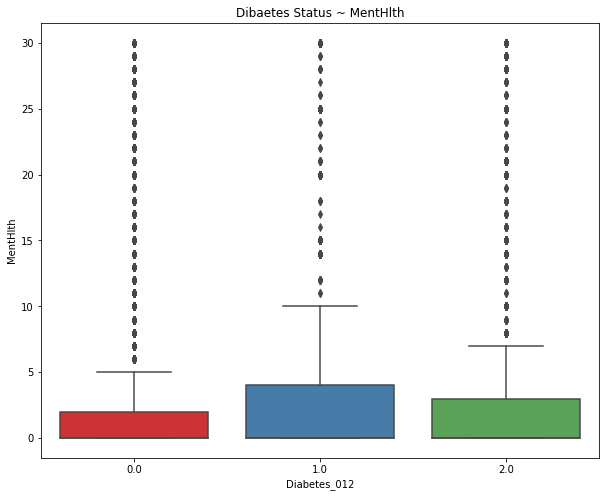

    Diabetes_012  PhysHlth   Count
0            0.0       0.0  140841
1            0.0       1.0   10026
2            0.0       2.0   12488
3            0.0       3.0    7033
4            0.0       4.0    3681
5            0.0       5.0    6140
6            0.0       6.0    1010
7            0.0       7.0    3705
8            0.0       8.0     629
9            0.0       9.0     138
10           0.0      10.0    4135
11           0.0      11.0      45
12           0.0      12.0     430
13           0.0      13.0      45
14           0.0      14.0    2052
15           0.0      15.0    3480
16           0.0      16.0      75
17           0.0      17.0      66
18           0.0      18.0     113
19           0.0      19.0      17
20           0.0      20.0    2277
21           0.0      21.0     506
22           0.0      22.0      43
23           0.0      23.0      37
24           0.0      24.0      54
25           0.0      25.0     906
26           0.0      26.0      43
27           0.0    

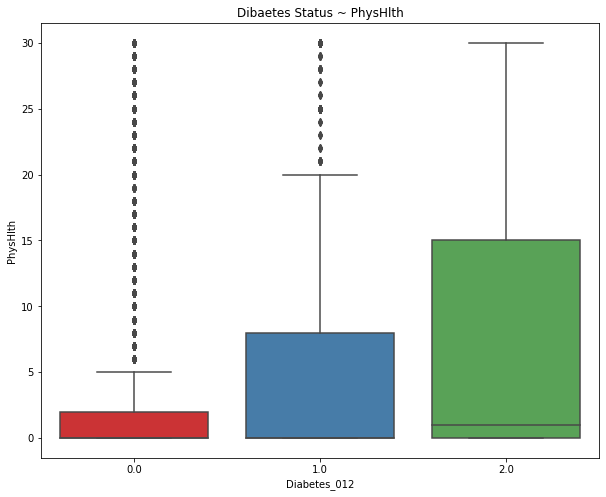

   Diabetes_012  DiffWalk   Count
0           0.0       0.0  185434
1           0.0       1.0   28269
2           1.0       0.0    3346
3           1.0       1.0    1285
4           2.0       0.0   22225
5           2.0       1.0   13121


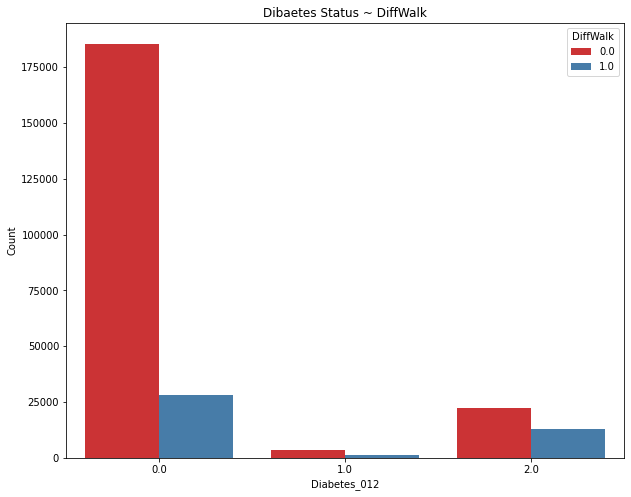

   Diabetes_012  Sex   Count
0           0.0  0.0  120959
1           0.0  1.0   92744
2           1.0  0.0    2604
3           1.0  1.0    2027
4           2.0  0.0   18411
5           2.0  1.0   16935


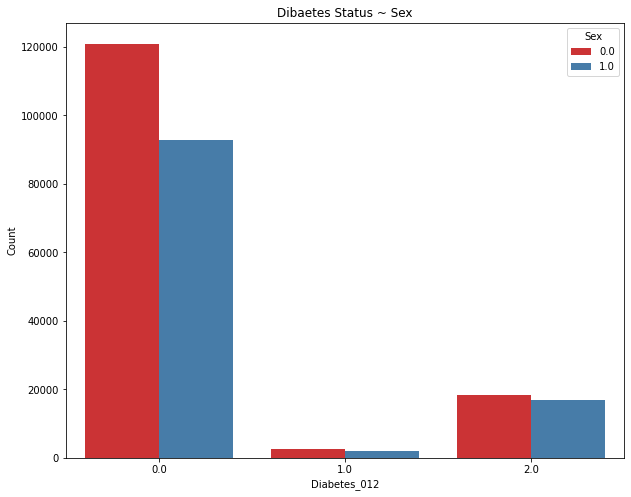

    Diabetes_012   Age  Count
0            0.0   1.0   5601
1            0.0   2.0   7404
2            0.0   3.0  10737
3            0.0   4.0  13055
4            0.0   5.0  14943
5            0.0   6.0  17765
6            0.0   7.0  22808
7            0.0   8.0  26019
8            0.0   9.0  26809
9            0.0  10.0  24939
10           0.0  11.0  17790
11           0.0  12.0  12132
12           0.0  13.0  13701
13           1.0   1.0     21
14           1.0   2.0     54
15           1.0   3.0     72
16           1.0   4.0    142
17           1.0   5.0    163
18           1.0   6.0    312
19           1.0   7.0    418
20           1.0   8.0    550
21           1.0   9.0    702
22           1.0  10.0    697
23           1.0  11.0    602
24           1.0  12.0    445
25           1.0  13.0    453
26           2.0   1.0     78
27           2.0   2.0    140
28           2.0   3.0    314
29           2.0   4.0    626
30           2.0   5.0   1051
31           2.0   6.0   1742
32        

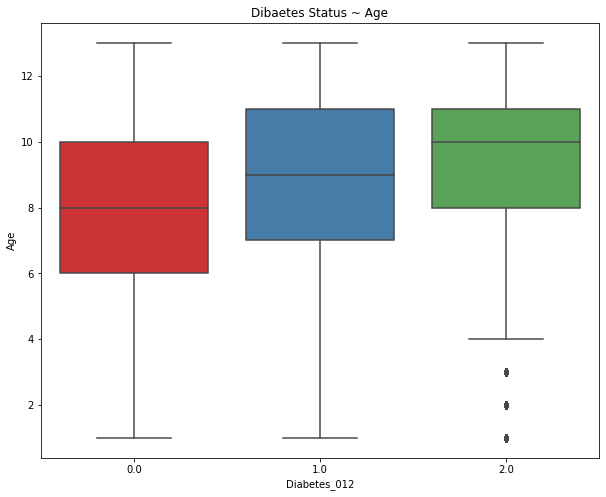

    Diabetes_012  Education  Count
0            0.0        1.0    125
1            0.0        2.0   2699
2            0.0        3.0   6868
3            0.0        4.0  50334
4            0.0        5.0  58223
5            0.0        6.0  95454
6            1.0        1.0      2
7            1.0        2.0    161
8            1.0        3.0    314
9            1.0        4.0   1350
10           1.0        5.0   1333
11           1.0        6.0   1471
12           2.0        1.0     47
13           2.0        2.0   1183
14           2.0        3.0   2296
15           2.0        4.0  11066
16           2.0        5.0  10354
17           2.0        6.0  10400


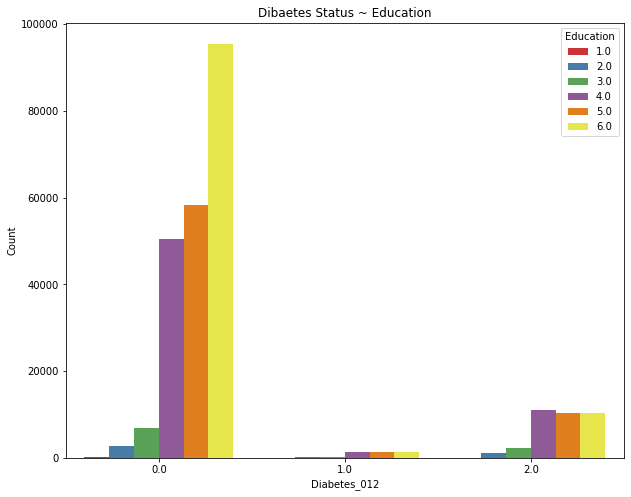

    Diabetes_012  Income  Count
0            0.0     1.0   7114
1            0.0     2.0   8341
2            0.0     3.0  12005
3            0.0     4.0  15622
4            0.0     5.0  20792
5            0.0     6.0  30431
6            0.0     7.0  37219
7            0.0     8.0  82179
8            1.0     1.0    314
9            1.0     2.0    356
10           1.0     3.0    421
11           1.0     4.0    459
12           1.0     5.0    587
13           1.0     6.0    748
14           1.0     7.0    735
15           1.0     8.0   1011
16           2.0     1.0   2383
17           2.0     2.0   3086
18           2.0     3.0   3568
19           2.0     4.0   4054
20           2.0     5.0   4504
21           2.0     6.0   5291
22           2.0     7.0   5265
23           2.0     8.0   7195


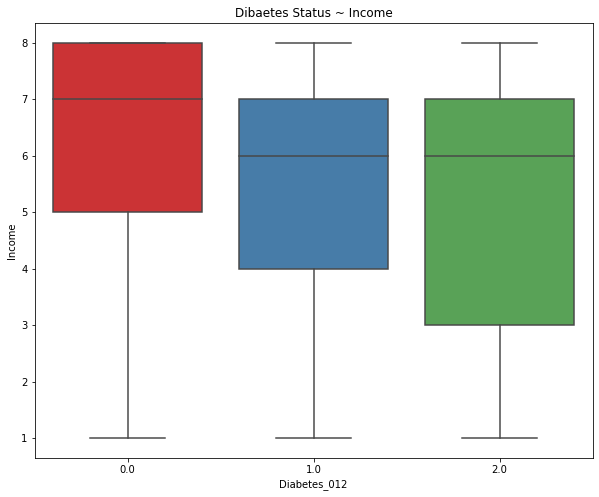

In [56]:
for item in titles:
    if item == 'Diabetes_012':
        pass
    else:
        diabetes_bp = df.groupby(['Diabetes_012', item]).size().reset_index(name = 'Count')
        print(diabetes_bp)

        #visualize diabetes status ~ features
        plt.figure(figsize = (10,8))
        if len(diabetes_bp) < 20:
            sns.barplot(x = 'Diabetes_012', y = 'Count', hue = item, data = diabetes_bp, palette = 'Set1')
        else:
            sns.boxplot(data = df, x = 'Diabetes_012', y = item, palette = 'Set1')
        plt.title(f"Dibaetes Status ~ {item}")
        plt.show()

# Computation and visualzation for other datasets
## For 5050 Diabetes_binary

In [57]:
titles = np.loadtxt('./diabetets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv', delimiter=',',dtype = str,max_rows = 1)
df= pd.read_csv('./diabetets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


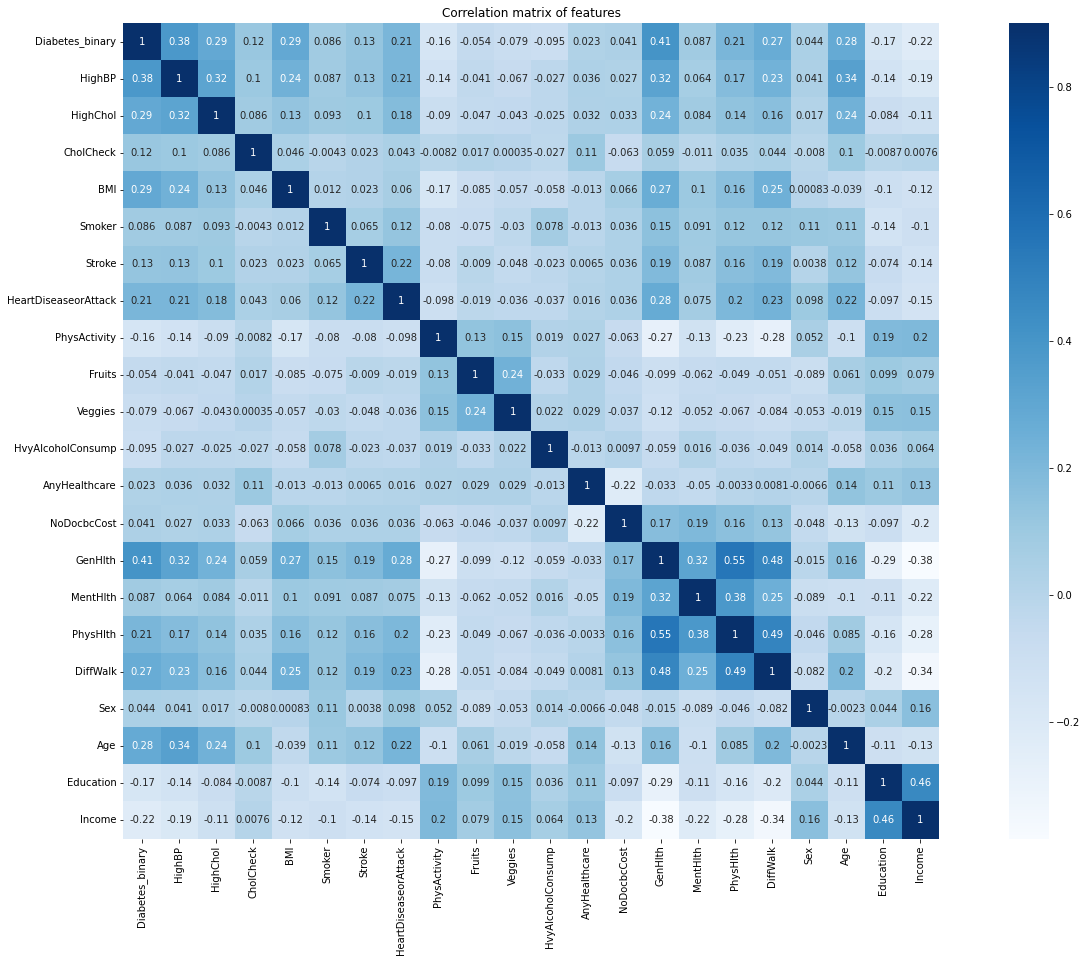

In [58]:
# Compute pairwise pearson correlation of columns, excluding NA/null values.
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, vmax = 0.9, annot= True,cmap = "Blues",square = True)
plt.title("Correlation matrix of features")
plt.show()

   Diabetes_binary  HighBP  Count
0              0.0     0.0  22118
1              0.0     1.0  13228
2              1.0     0.0   8742
3              1.0     1.0  26604


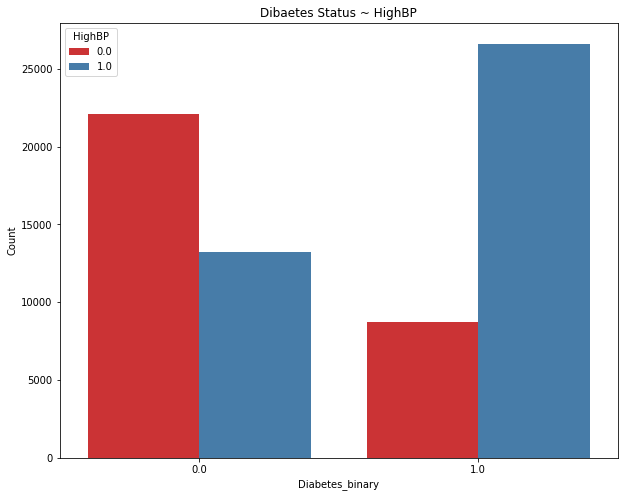

   Diabetes_binary  HighChol  Count
0              0.0       0.0  21869
1              0.0       1.0  13477
2              1.0       0.0  11660
3              1.0       1.0  23686


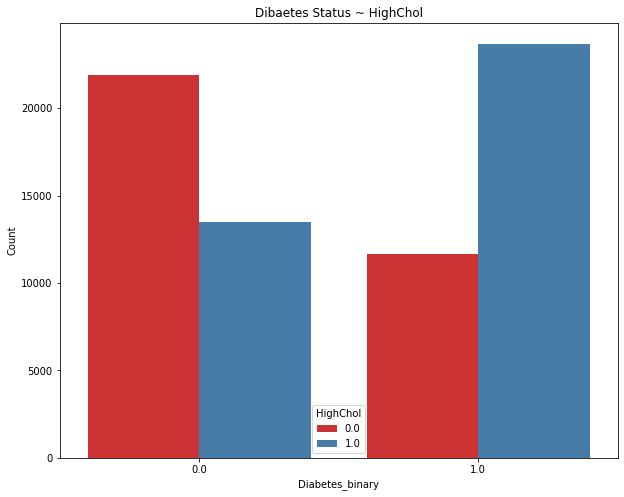

   Diabetes_binary  CholCheck  Count
0              0.0        0.0   1508
1              0.0        1.0  33838
2              1.0        0.0    241
3              1.0        1.0  35105


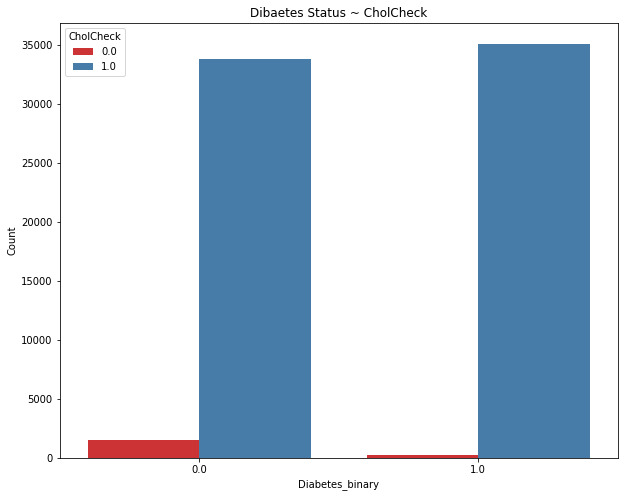

     Diabetes_binary   BMI  Count
0                0.0  12.0      1
1                0.0  13.0      6
2                0.0  14.0      4
3                0.0  15.0     18
4                0.0  16.0     50
5                0.0  17.0    122
6                0.0  18.0    283
7                0.0  19.0    556
8                0.0  20.0   1015
9                0.0  21.0   1549
10               0.0  22.0   2087
11               0.0  23.0   2402
12               0.0  24.0   2923
13               0.0  25.0   2580
14               0.0  26.0   2973
15               0.0  27.0   3570
16               0.0  28.0   2332
17               0.0  29.0   1988
18               0.0  30.0   2022
19               0.0  31.0   1641
20               0.0  32.0   1361
21               0.0  33.0   1119
22               0.0  34.0    877
23               0.0  35.0    663
24               0.0  36.0    554
25               0.0  37.0    489
26               0.0  38.0    403
27               0.0  39.0    334
28            

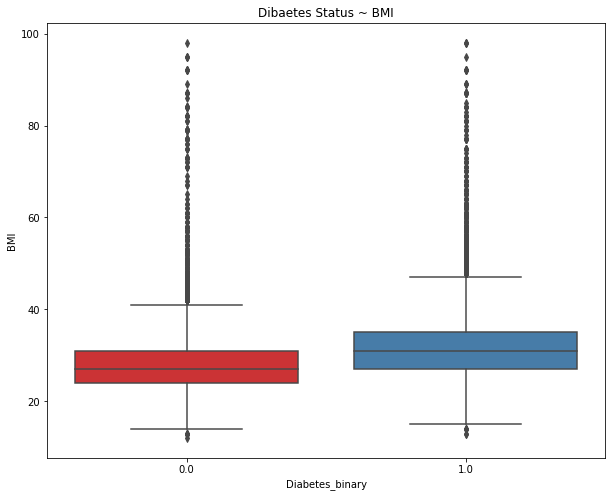

   Diabetes_binary  Smoker  Count
0              0.0     0.0  20065
1              0.0     1.0  15281
2              1.0     0.0  17029
3              1.0     1.0  18317


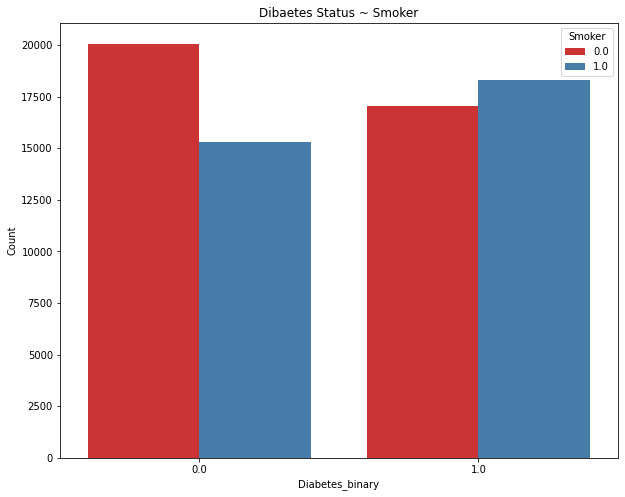

   Diabetes_binary  Stroke  Count
0              0.0     0.0  34219
1              0.0     1.0   1127
2              1.0     0.0  32078
3              1.0     1.0   3268


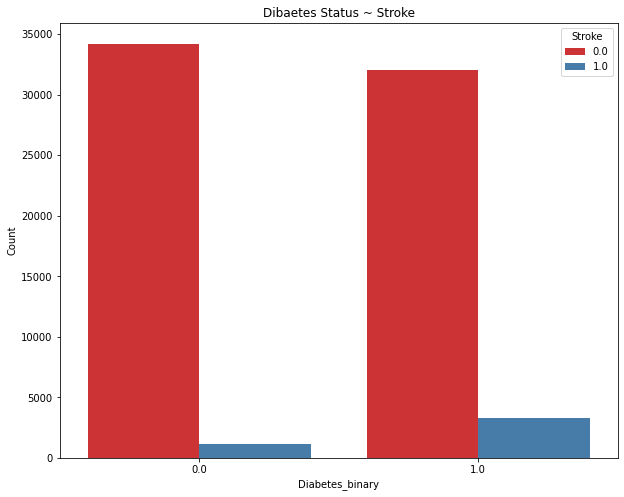

   Diabetes_binary  HeartDiseaseorAttack  Count
0              0.0                   0.0  32775
1              0.0                   1.0   2571
2              1.0                   0.0  27468
3              1.0                   1.0   7878


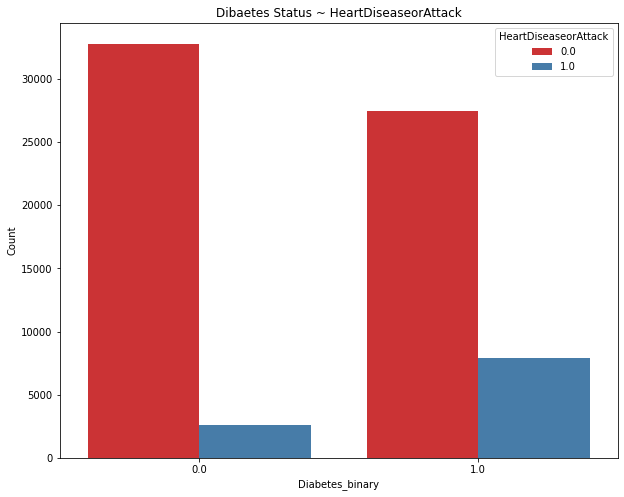

   Diabetes_binary  PhysActivity  Count
0              0.0           0.0   7934
1              0.0           1.0  27412
2              1.0           0.0  13059
3              1.0           1.0  22287


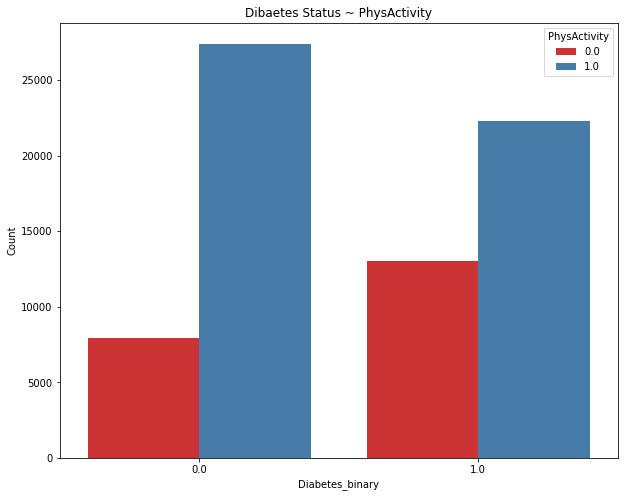

   Diabetes_binary  Fruits  Count
0              0.0     0.0  12790
1              0.0     1.0  22556
2              1.0     0.0  14653
3              1.0     1.0  20693


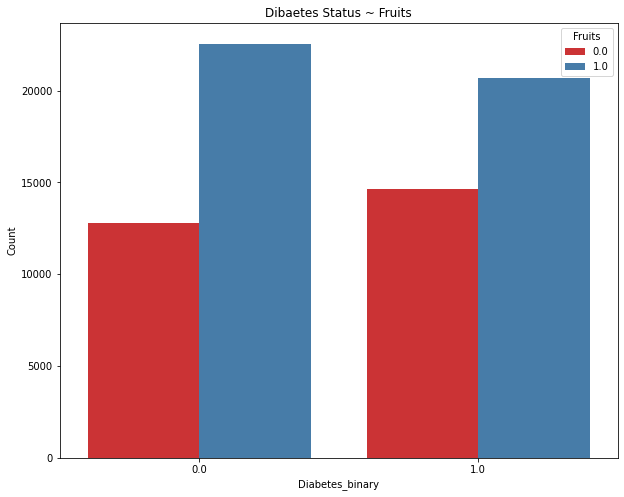

   Diabetes_binary  Veggies  Count
0              0.0      0.0   6322
1              0.0      1.0  29024
2              1.0      0.0   8610
3              1.0      1.0  26736


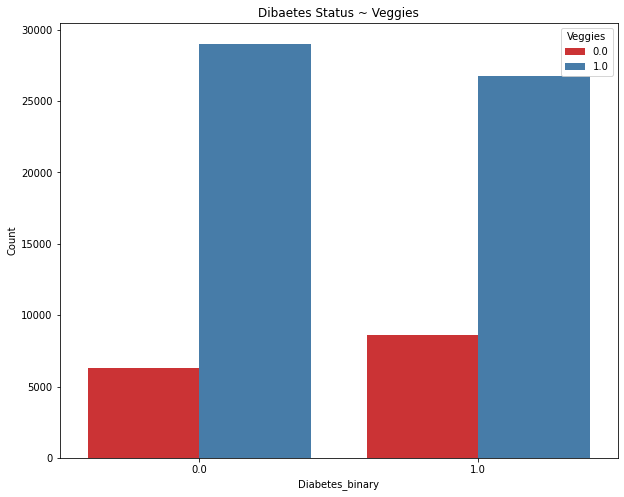

   Diabetes_binary  HvyAlcoholConsump  Count
0              0.0                0.0  33158
1              0.0                1.0   2188
2              1.0                0.0  34514
3              1.0                1.0    832


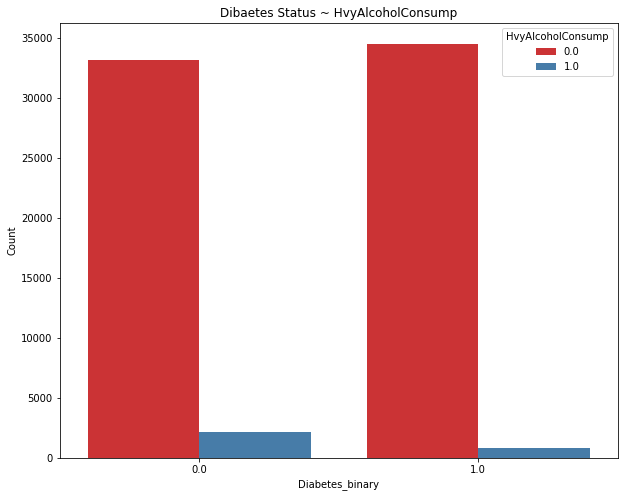

   Diabetes_binary  AnyHealthcare  Count
0              0.0            0.0   1762
1              0.0            1.0  33584
2              1.0            0.0   1422
3              1.0            1.0  33924


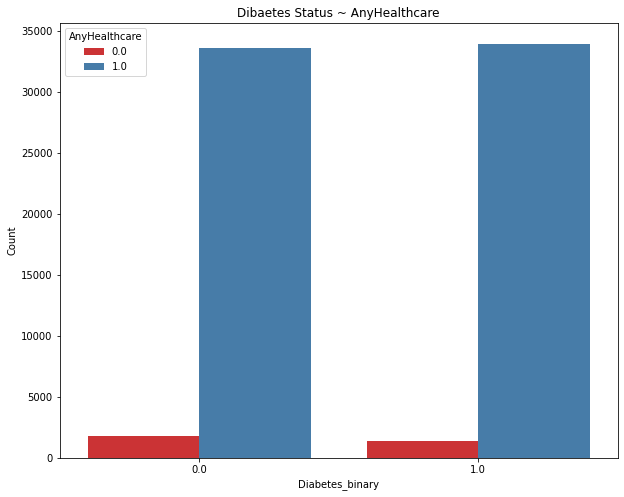

   Diabetes_binary  NoDocbcCost  Count
0              0.0          0.0  32449
1              0.0          1.0   2897
2              1.0          0.0  31604
3              1.0          1.0   3742


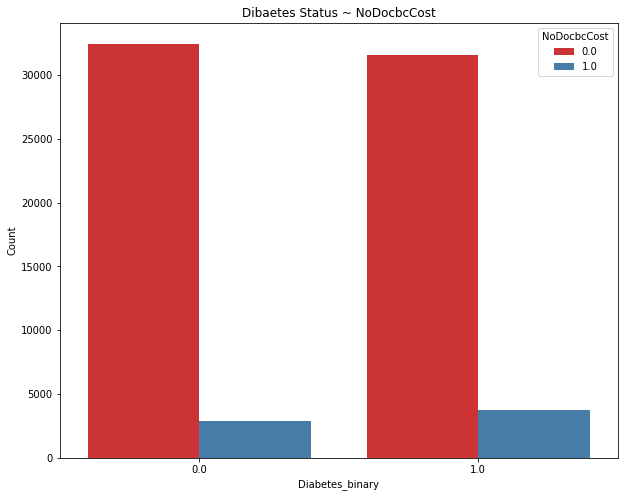

   Diabetes_binary  GenHlth  Count
0              0.0      1.0   7142
1              0.0      2.0  13491
2              0.0      3.0   9970
3              0.0      4.0   3513
4              0.0      5.0   1230
5              1.0      1.0   1140
6              1.0      2.0   6381
7              1.0      3.0  13457
8              1.0      4.0   9790
9              1.0      5.0   4578


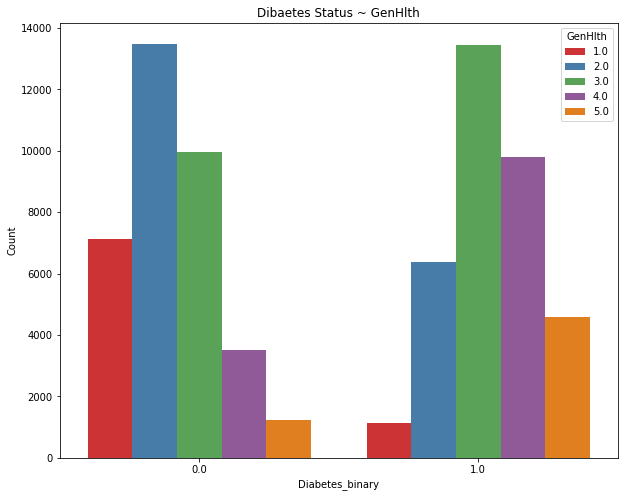

    Diabetes_binary  MentHlth  Count
0               0.0       0.0  24688
1               0.0       1.0   1239
2               0.0       2.0   1759
3               0.0       3.0   1043
4               0.0       4.0    492
5               0.0       5.0   1296
6               0.0       6.0    124
7               0.0       7.0    420
8               0.0       8.0     88
9               0.0       9.0     15
10              0.0      10.0    860
11              0.0      11.0      5
12              0.0      12.0     63
13              0.0      13.0      7
14              0.0      14.0    155
15              0.0      15.0    744
16              0.0      16.0     14
17              0.0      17.0      7
18              0.0      18.0     22
19              0.0      19.0      3
20              0.0      20.0    462
21              0.0      21.0     36
22              0.0      22.0     11
23              0.0      23.0      5
24              0.0      24.0      4
25              0.0      25.0    152
2

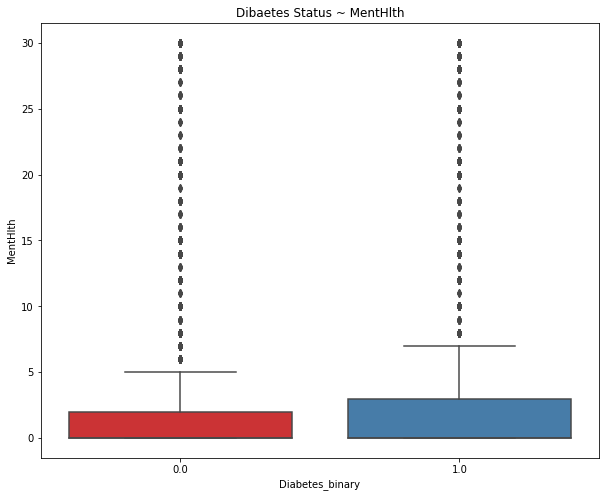

    Diabetes_binary  PhysHlth  Count
0               0.0       0.0  23175
1               0.0       1.0   1665
2               0.0       2.0   2074
3               0.0       3.0   1149
4               0.0       4.0    613
5               0.0       5.0   1018
6               0.0       6.0    165
7               0.0       7.0    583
8               0.0       8.0    117
9               0.0       9.0     19
10              0.0      10.0    690
11              0.0      11.0     10
12              0.0      12.0     76
13              0.0      13.0     10
14              0.0      14.0    329
15              0.0      15.0    618
16              0.0      16.0     16
17              0.0      17.0      8
18              0.0      18.0     15
19              0.0      19.0      7
20              0.0      20.0    375
21              0.0      21.0     90
22              0.0      22.0      8
23              0.0      23.0     11
24              0.0      24.0      9
25              0.0      25.0    163
2

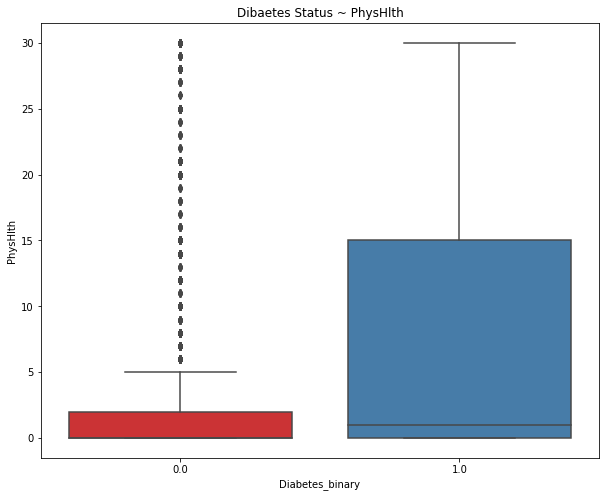

   Diabetes_binary  DiffWalk  Count
0              0.0       0.0  30601
1              0.0       1.0   4745
2              1.0       0.0  22225
3              1.0       1.0  13121


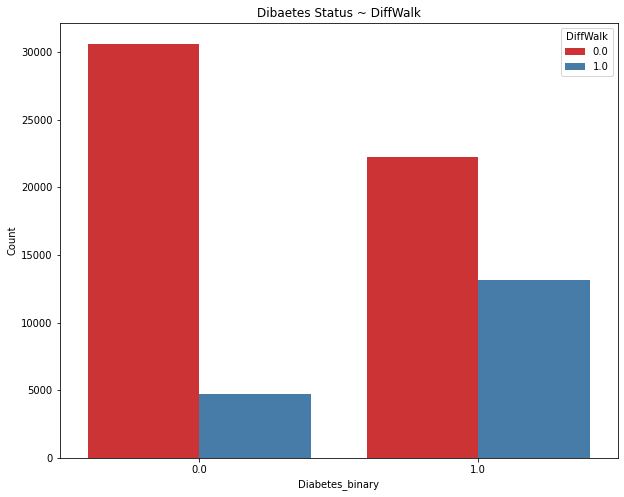

   Diabetes_binary  Sex  Count
0              0.0  0.0  19975
1              0.0  1.0  15371
2              1.0  0.0  18411
3              1.0  1.0  16935


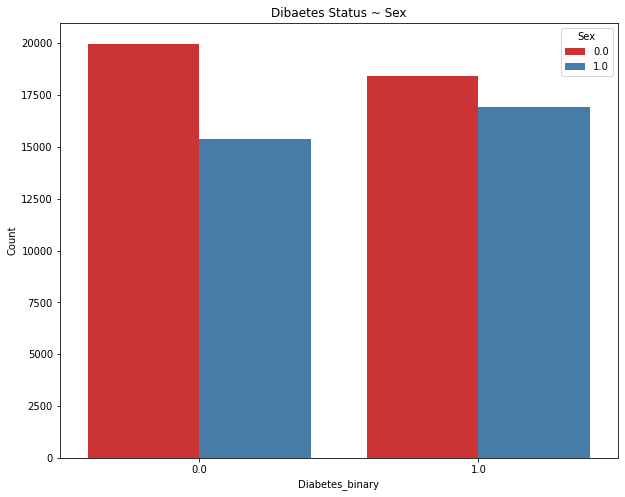

    Diabetes_binary   Age  Count
0               0.0   1.0    901
1               0.0   2.0   1256
2               0.0   3.0   1735
3               0.0   4.0   2167
4               0.0   5.0   2469
5               0.0   6.0   2906
6               0.0   7.0   3784
7               0.0   8.0   4340
8               0.0   9.0   4379
9               0.0  10.0   4298
10              0.0  11.0   2903
11              0.0  12.0   1991
12              0.0  13.0   2217
13              1.0   1.0     78
14              1.0   2.0    140
15              1.0   3.0    314
16              1.0   4.0    626
17              1.0   5.0   1051
18              1.0   6.0   1742
19              1.0   7.0   3088
20              1.0   8.0   4263
21              1.0   9.0   5733
22              1.0  10.0   6558
23              1.0  11.0   5141
24              1.0  12.0   3403
25              1.0  13.0   3209


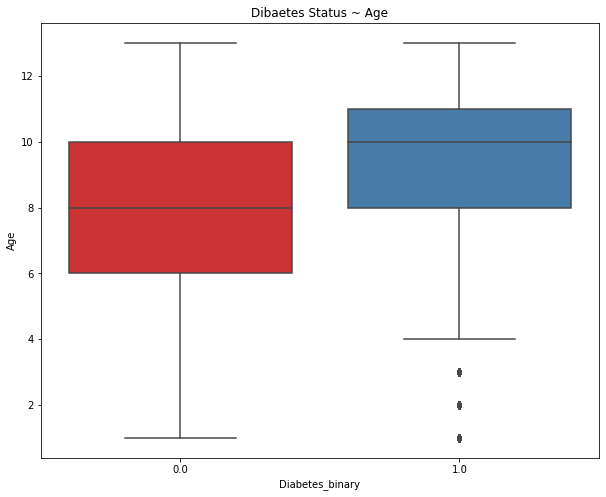

    Diabetes_binary  Education  Count
0               0.0        1.0     28
1               0.0        2.0    464
2               0.0        3.0   1151
3               0.0        4.0   8407
4               0.0        5.0   9676
5               0.0        6.0  15620
6               1.0        1.0     47
7               1.0        2.0   1183
8               1.0        3.0   2296
9               1.0        4.0  11066
10              1.0        5.0  10354
11              1.0        6.0  10400


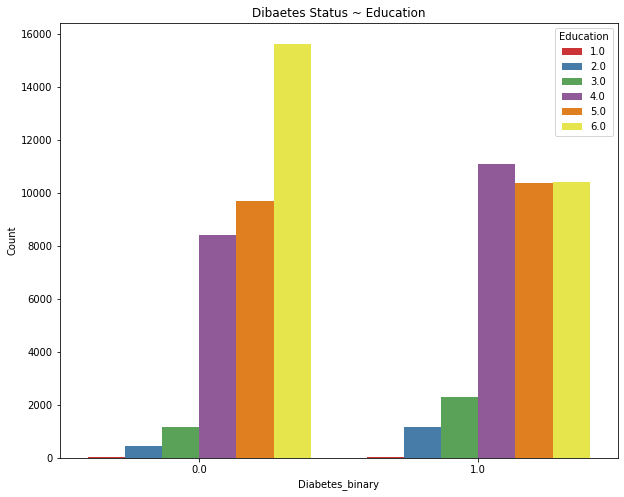

    Diabetes_binary  Income  Count
0               0.0     1.0   1228
1               0.0     2.0   1412
2               0.0     3.0   1989
3               0.0     4.0   2604
4               0.0     5.0   3506
5               0.0     6.0   4996
6               0.0     7.0   6160
7               0.0     8.0  13451
8               1.0     1.0   2383
9               1.0     2.0   3086
10              1.0     3.0   3568
11              1.0     4.0   4054
12              1.0     5.0   4504
13              1.0     6.0   5291
14              1.0     7.0   5265
15              1.0     8.0   7195


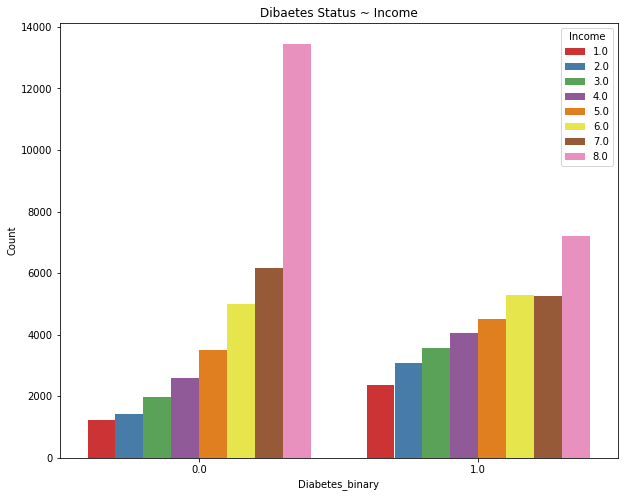

In [59]:

for item in titles:
    if item == 'Diabetes_binary':
        pass
    else:
        diabetes_bp = df.groupby(['Diabetes_binary', item]).size().reset_index(name = 'Count')
        print(diabetes_bp)

        #visualize diabetes status ~ features
        plt.figure(figsize = (10,8))
        if len(diabetes_bp) < 20:
            sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = item, data = diabetes_bp, palette = 'Set1')
        else:
            sns.boxplot(data = df, x = 'Diabetes_binary', y = item, palette = 'Set1')
        plt.title(f"Dibaetes Status ~ {item}")
        plt.show()

## For Diabetes_binary

In [60]:
titles = np.loadtxt('./diabetets/diabetes_binary_health_indicators_BRFSS2015.csv', delimiter=',',dtype = str,max_rows = 1)
df= pd.read_csv('./diabetets/diabetes_binary_health_indicators_BRFSS2015.csv')
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


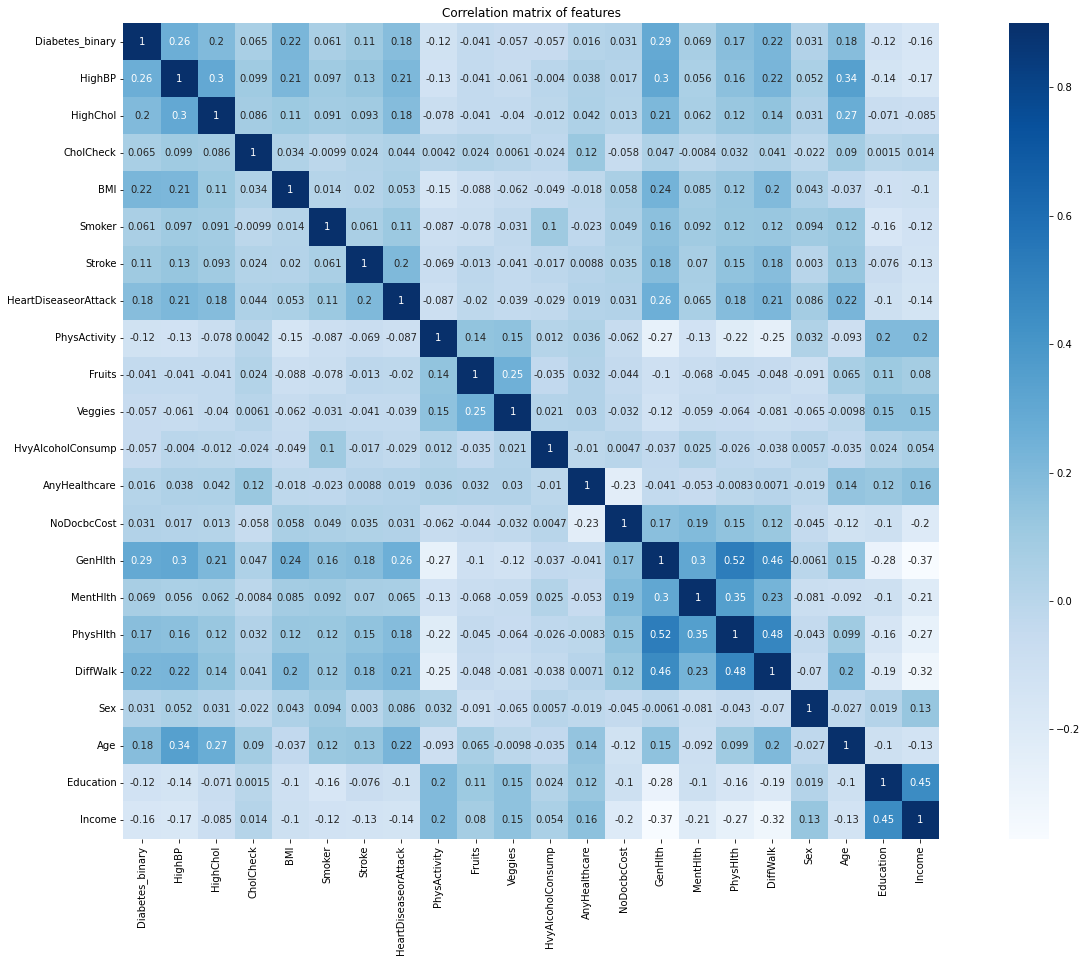

In [61]:
# Compute pairwise pearson correlation of columns, excluding NA/null values.
corr = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, vmax = 0.9, annot= True,cmap = "Blues",square = True)
plt.title("Correlation matrix of features")
plt.show()

   Diabetes_binary  HighBP   Count
0              0.0     0.0  136109
1              0.0     1.0   82225
2              1.0     0.0    8742
3              1.0     1.0   26604


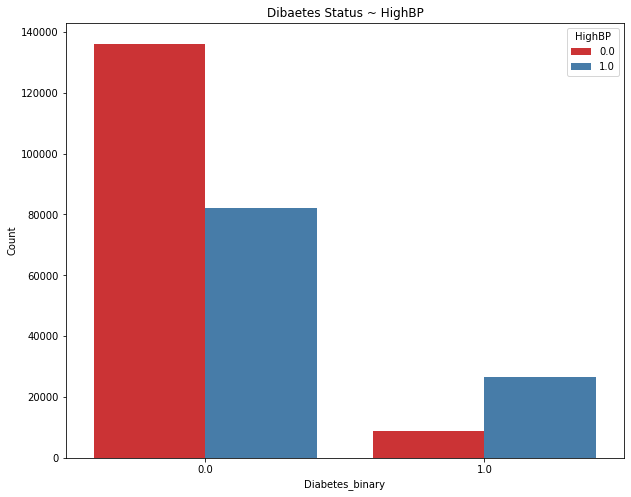

   Diabetes_binary  HighChol   Count
0              0.0       0.0  134429
1              0.0       1.0   83905
2              1.0       0.0   11660
3              1.0       1.0   23686


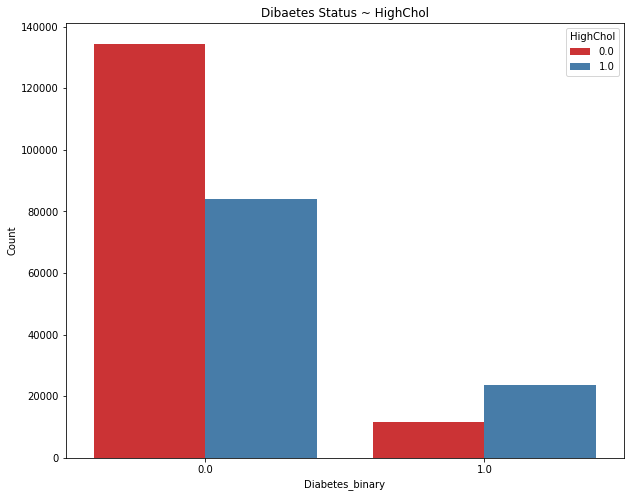

   Diabetes_binary  CholCheck   Count
0              0.0        0.0    9229
1              0.0        1.0  209105
2              1.0        0.0     241
3              1.0        1.0   35105


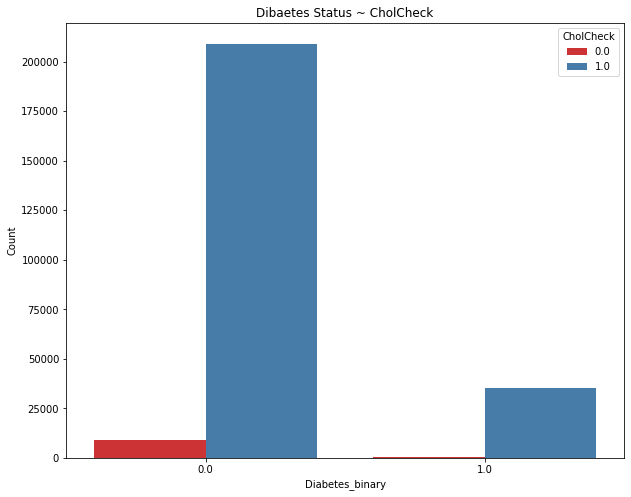

     Diabetes_binary   BMI  Count
0                0.0  12.0      6
1                0.0  13.0     19
2                0.0  14.0     37
3                0.0  15.0    120
4                0.0  16.0    328
5                0.0  17.0    728
6                0.0  18.0   1720
7                0.0  19.0   3833
8                0.0  20.0   6086
9                0.0  21.0   9376
10               0.0  22.0  12952
11               0.0  23.0  14697
12               0.0  24.0  18081
13               0.0  25.0  15695
14               0.0  26.0  18560
15               0.0  27.0  21849
16               0.0  28.0  14294
17               0.0  29.0  12659
18               0.0  30.0  12251
19               0.0  31.0  10163
20               0.0  32.0   8354
21               0.0  33.0   6908
22               0.0  34.0   5494
23               0.0  35.0   4131
24               0.0  36.0   3393
25               0.0  37.0   3029
26               0.0  38.0   2385
27               0.0  39.0   2056
28            

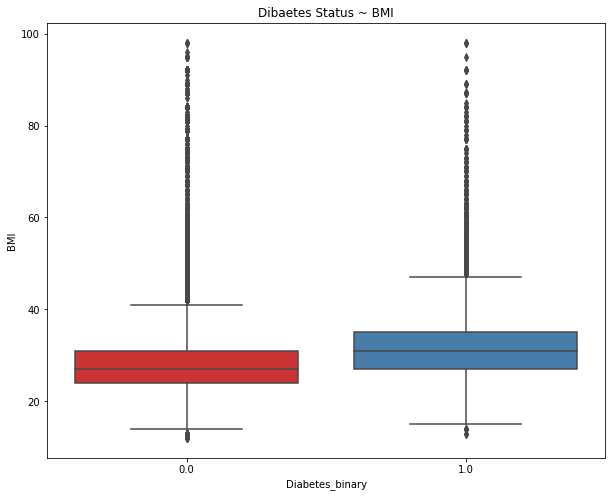

   Diabetes_binary  Smoker   Count
0              0.0     0.0  124228
1              0.0     1.0   94106
2              1.0     0.0   17029
3              1.0     1.0   18317


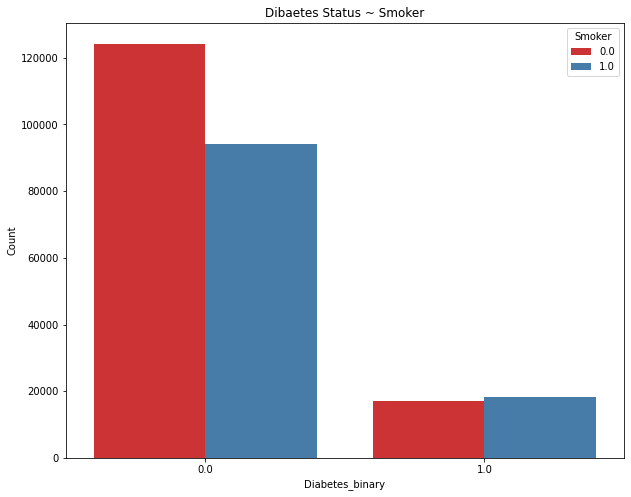

   Diabetes_binary  Stroke   Count
0              0.0     0.0  211310
1              0.0     1.0    7024
2              1.0     0.0   32078
3              1.0     1.0    3268


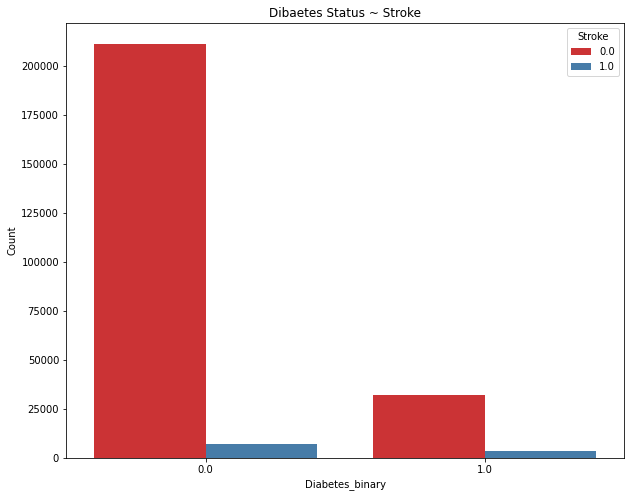

   Diabetes_binary  HeartDiseaseorAttack   Count
0              0.0                   0.0  202319
1              0.0                   1.0   16015
2              1.0                   0.0   27468
3              1.0                   1.0    7878


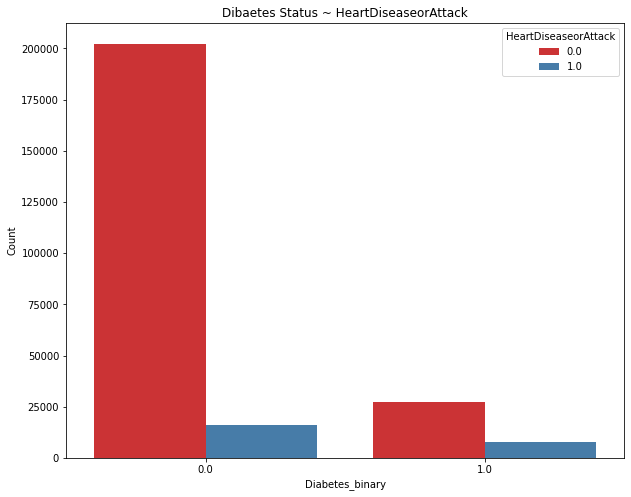

   Diabetes_binary  PhysActivity   Count
0              0.0           0.0   48701
1              0.0           1.0  169633
2              1.0           0.0   13059
3              1.0           1.0   22287


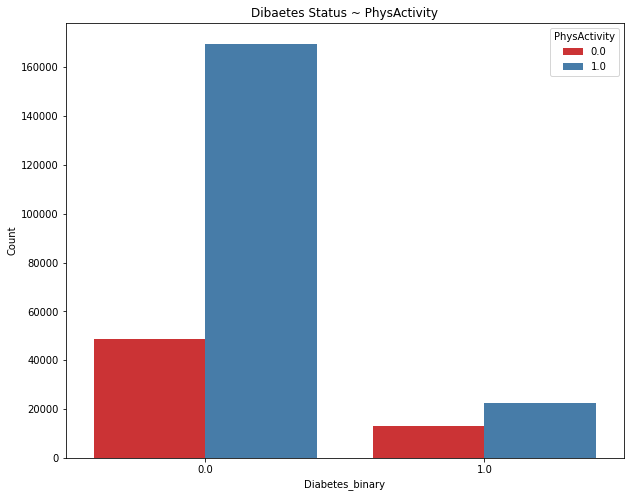

   Diabetes_binary  Fruits   Count
0              0.0     0.0   78129
1              0.0     1.0  140205
2              1.0     0.0   14653
3              1.0     1.0   20693


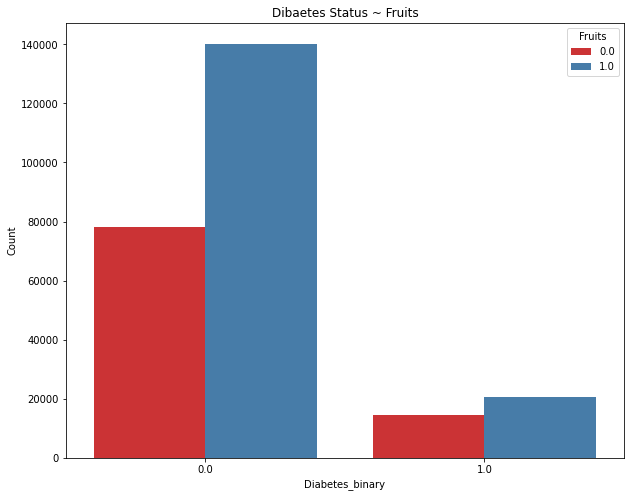

   Diabetes_binary  Veggies   Count
0              0.0      0.0   39229
1              0.0      1.0  179105
2              1.0      0.0    8610
3              1.0      1.0   26736


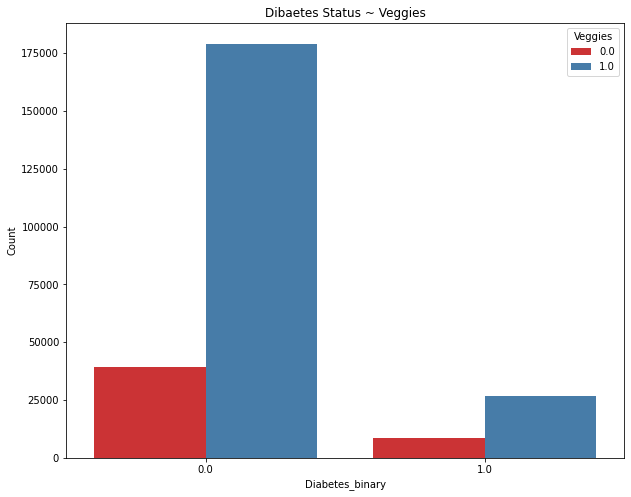

   Diabetes_binary  HvyAlcoholConsump   Count
0              0.0                0.0  204910
1              0.0                1.0   13424
2              1.0                0.0   34514
3              1.0                1.0     832


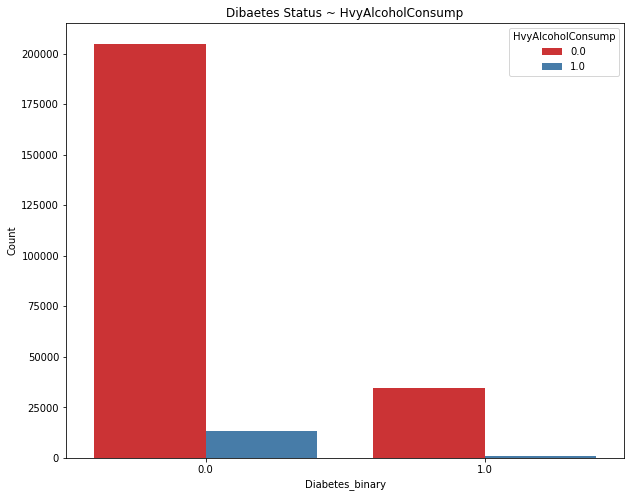

   Diabetes_binary  AnyHealthcare   Count
0              0.0            0.0   10995
1              0.0            1.0  207339
2              1.0            0.0    1422
3              1.0            1.0   33924


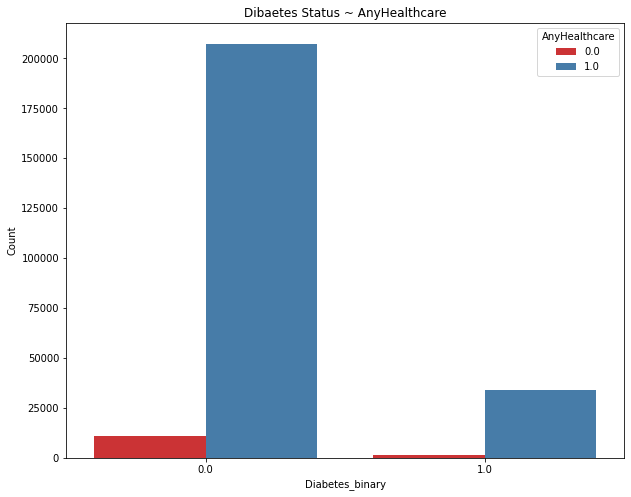

   Diabetes_binary  NoDocbcCost   Count
0              0.0          0.0  200722
1              0.0          1.0   17612
2              1.0          0.0   31604
3              1.0          1.0    3742


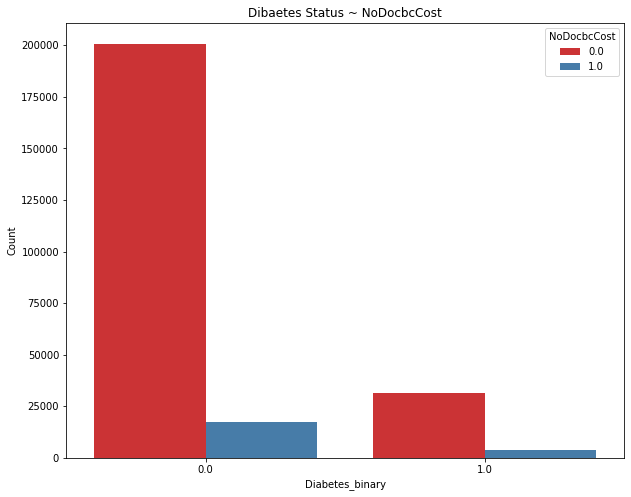

   Diabetes_binary  GenHlth  Count
0              0.0      1.0  44159
1              0.0      2.0  82703
2              0.0      3.0  62189
3              0.0      4.0  21780
4              0.0      5.0   7503
5              1.0      1.0   1140
6              1.0      2.0   6381
7              1.0      3.0  13457
8              1.0      4.0   9790
9              1.0      5.0   4578


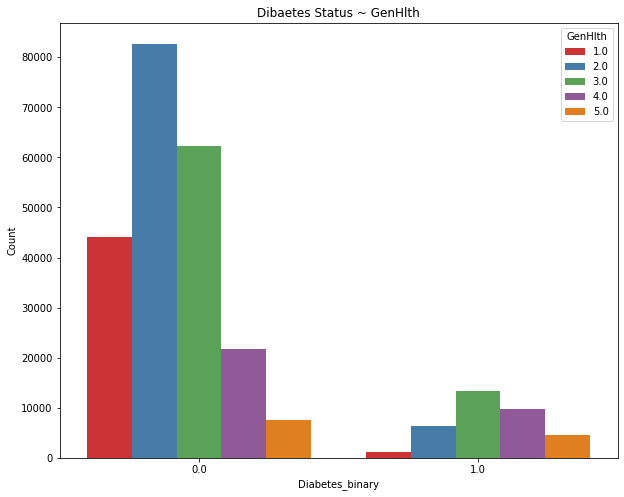

    Diabetes_binary  MentHlth   Count
0               0.0       0.0  152277
1               0.0       1.0    7726
2               0.0       2.0   11546
3               0.0       3.0    6457
4               0.0       4.0    3300
5               0.0       5.0    7807
6               0.0       6.0     824
7               0.0       7.0    2695
8               0.0       8.0     529
9               0.0       9.0      78
10              0.0      10.0    5309
11              0.0      11.0      38
12              0.0      12.0     331
13              0.0      13.0      33
14              0.0      14.0     969
15              0.0      15.0    4482
16              0.0      16.0      74
17              0.0      17.0      43
18              0.0      18.0      77
19              0.0      19.0      12
20              0.0      20.0    2701
21              0.0      21.0     179
22              0.0      22.0      52
23              0.0      23.0      30
24              0.0      24.0      27
25          

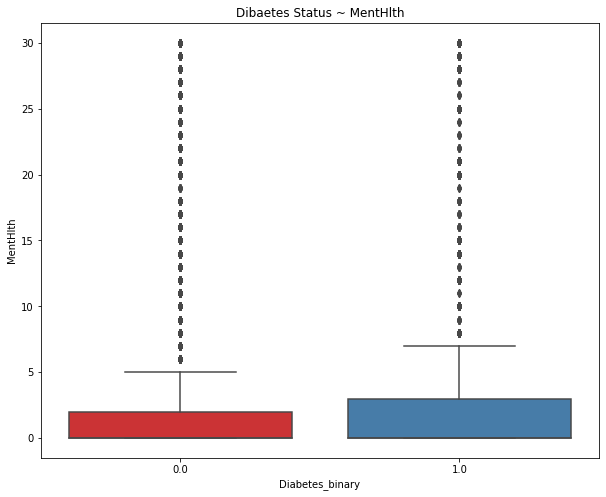

    Diabetes_binary  PhysHlth   Count
0               0.0       0.0  143312
1               0.0       1.0   10200
2               0.0       2.0   12736
3               0.0       3.0    7206
4               0.0       4.0    3779
5               0.0       5.0    6308
6               0.0       6.0    1048
7               0.0       7.0    3795
8               0.0       8.0     650
9               0.0       9.0     143
10              0.0      10.0    4305
11              0.0      11.0      48
12              0.0      12.0     449
13              0.0      13.0      52
14              0.0      14.0    2114
15              0.0      15.0    3621
16              0.0      16.0      78
17              0.0      17.0      69
18              0.0      18.0     117
19              0.0      19.0      19
20              0.0      20.0    2356
21              0.0      21.0     524
22              0.0      22.0      47
23              0.0      23.0      40
24              0.0      24.0      57
25          

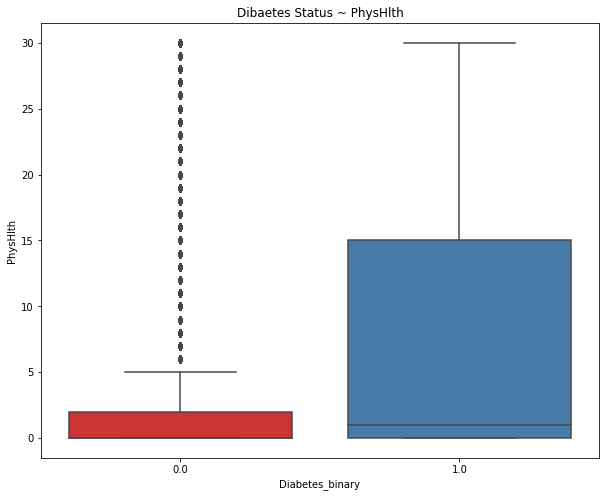

   Diabetes_binary  DiffWalk   Count
0              0.0       0.0  188780
1              0.0       1.0   29554
2              1.0       0.0   22225
3              1.0       1.0   13121


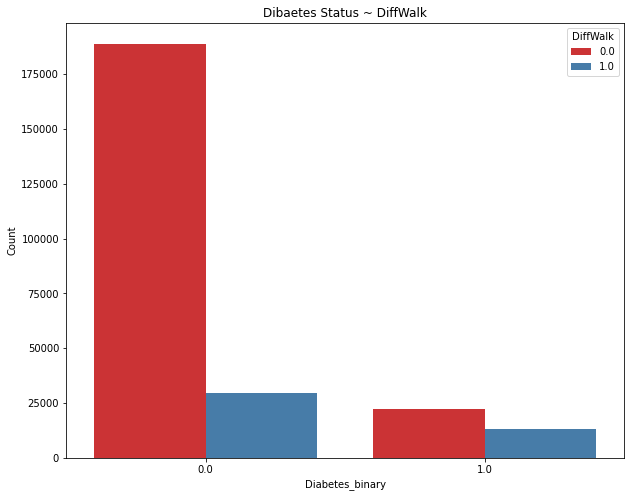

   Diabetes_binary  Sex   Count
0              0.0  0.0  123563
1              0.0  1.0   94771
2              1.0  0.0   18411
3              1.0  1.0   16935


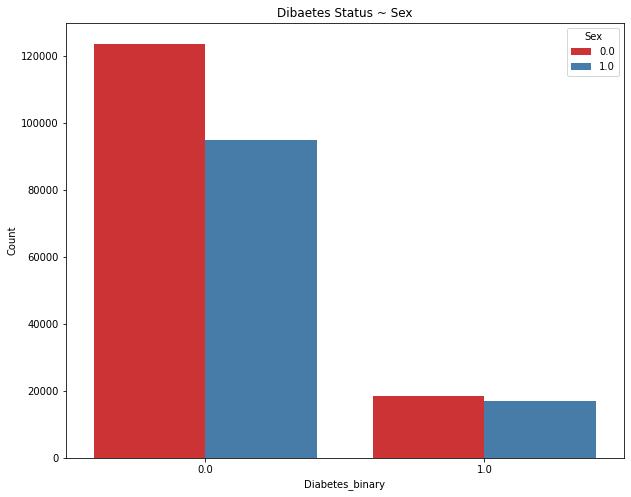

    Diabetes_binary   Age  Count
0               0.0   1.0   5622
1               0.0   2.0   7458
2               0.0   3.0  10809
3               0.0   4.0  13197
4               0.0   5.0  15106
5               0.0   6.0  18077
6               0.0   7.0  23226
7               0.0   8.0  26569
8               0.0   9.0  27511
9               0.0  10.0  25636
10              0.0  11.0  18392
11              0.0  12.0  12577
12              0.0  13.0  14154
13              1.0   1.0     78
14              1.0   2.0    140
15              1.0   3.0    314
16              1.0   4.0    626
17              1.0   5.0   1051
18              1.0   6.0   1742
19              1.0   7.0   3088
20              1.0   8.0   4263
21              1.0   9.0   5733
22              1.0  10.0   6558
23              1.0  11.0   5141
24              1.0  12.0   3403
25              1.0  13.0   3209


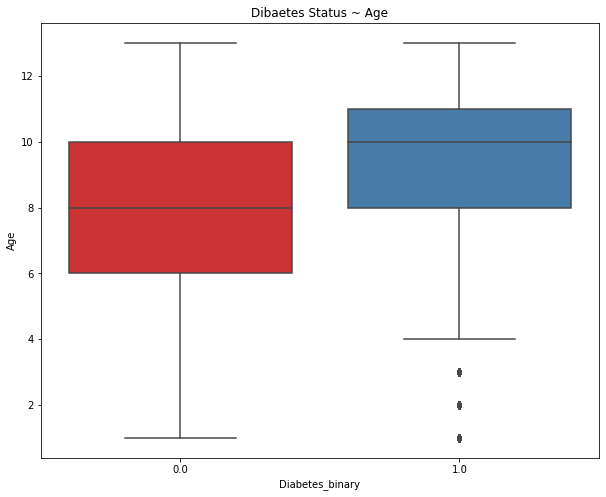

    Diabetes_binary  Education  Count
0               0.0        1.0    127
1               0.0        2.0   2860
2               0.0        3.0   7182
3               0.0        4.0  51684
4               0.0        5.0  59556
5               0.0        6.0  96925
6               1.0        1.0     47
7               1.0        2.0   1183
8               1.0        3.0   2296
9               1.0        4.0  11066
10              1.0        5.0  10354
11              1.0        6.0  10400


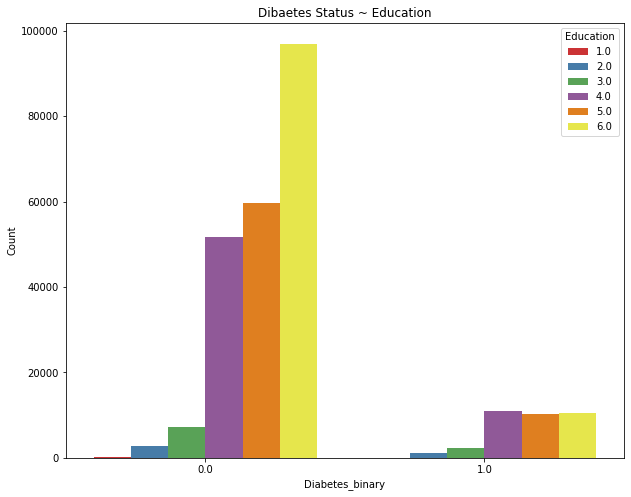

    Diabetes_binary  Income  Count
0               0.0     1.0   7428
1               0.0     2.0   8697
2               0.0     3.0  12426
3               0.0     4.0  16081
4               0.0     5.0  21379
5               0.0     6.0  31179
6               0.0     7.0  37954
7               0.0     8.0  83190
8               1.0     1.0   2383
9               1.0     2.0   3086
10              1.0     3.0   3568
11              1.0     4.0   4054
12              1.0     5.0   4504
13              1.0     6.0   5291
14              1.0     7.0   5265
15              1.0     8.0   7195


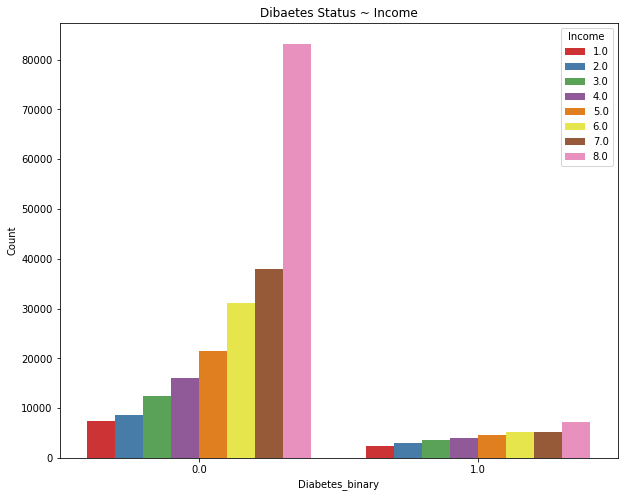

In [62]:

for item in titles:
    if item == 'Diabetes_binary':
        pass
    else:
        diabetes_bp = df.groupby(['Diabetes_binary', item]).size().reset_index(name = 'Count')
        print(diabetes_bp)

        #visualize diabetes status ~ features
        plt.figure(figsize = (10,8))
        if len(diabetes_bp) < 20:
            sns.barplot(x = 'Diabetes_binary', y = 'Count', hue = item, data = diabetes_bp, palette = 'Set1')
        else:
            sns.boxplot(data = df, x = 'Diabetes_binary', y = item, palette = 'Set1')
        plt.title(f"Dibaetes Status ~ {item}")
        plt.show()